In [45]:
from osgeo import ogr
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import box

In [35]:
bf = gpd.read_file('BFE.shp')

In [46]:
bfb = bf.total_bounds


-96.82072805099995

<AxesSubplot:>

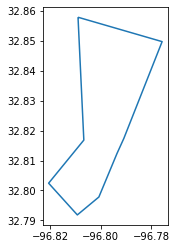

In [41]:
bfb = Polygon([])
co_b = co.total_bounds
b = box(co_b[0], co_b[1], co_b[2], co_b[3])
bbox = folium.GeoJson(data=b)
bbox.add_to(m)
m

In [4]:
bf.explore()

In [5]:
bf.geometry

0    POLYGON Z ((-96.80906 32.85778 0.00000, -96.77...
Name: geometry, dtype: geometry

In [6]:
spacing = 0.00001
dist = np.arange(0, bf.length[0], spacing)

C:\Users\abreunig\AppData\Local\Temp\2\ipykernel_11544\2692515292.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = np.arange(0, bf.length[0], spacing)


In [7]:
pts = [bf.boundary[0].interpolate(d) for d in dist] + [bf.boundary[0]]

In [21]:
from shapely.ops import unary_union
multipoint = unary_union(pts)

In [22]:
pt_feature = gpd.GeoDataFrame(geometry=[multipoint], crs='EPSG:4326')

In [17]:
pt_feature['geometry']

0    GEOMETRYCOLLECTION Z (POINT Z (-96.82072 32.80...
Name: geometry, dtype: geometry

In [23]:
pt_feature = pt_feature.geometry.explode(index_parts=False)

In [24]:
pt_feature

0                 POINT Z (-96.82072 32.80243 0.00000)
0                 POINT Z (-96.82072 32.80244 0.00000)
0                 POINT Z (-96.82072 32.80243 0.00000)
0                 POINT Z (-96.82072 32.80245 0.00000)
0                 POINT Z (-96.82071 32.80245 0.00000)
                           ...                        
0                 POINT Z (-96.77570 32.84965 0.00000)
0                 POINT Z (-96.77569 32.84963 0.00000)
0                 POINT Z (-96.77569 32.84964 0.00000)
0                 POINT Z (-96.77569 32.84965 0.00000)
0    LINESTRING Z (-96.80906 32.85778 0.00000, -96....
Name: geometry, Length: 17902, dtype: geometry

In [25]:
pt_final = gpd.GeoDataFrame(geometry=pt_feature.iloc[:-2].geometry, crs='EPSG:4326')

In [27]:
pt_final.tail()

,geometry
0,POINT Z (-96.77570 32.84962 0.00000)
0,POINT Z (-96.77570 32.84962 0.00000)
0,POINT Z (-96.77570 32.84965 0.00000)
0,POINT Z (-96.77569 32.84963 0.00000)
0,POINT Z (-96.77569 32.84964 0.00000)


In [137]:
pt_final.to_file('interp_pts.shp')

D:\mini-forge\envs\geopandas\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [29]:
rast = rasterio.open('dallas_1m.tif')

<AxesSubplot:>

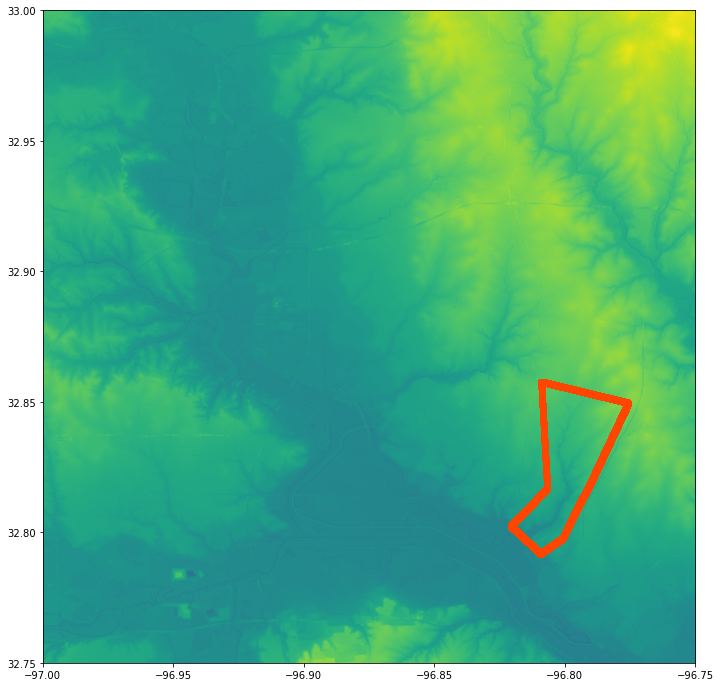

In [143]:
fig, ax = plt.subplots(figsize=(12,12))
pt_final.plot(ax=ax, color='orangered')
show(rast, ax=ax)

In [30]:
for p in pt_final['geometry']:
    print(f'Long: {p.xy[0][0]}', f'Lat: {p.xy[1][0]}')

Long: -96.82072482712225 Lat: 32.80243229539933
Long: -96.82072414692543 Lat: 32.8024393045355
Long: -96.82071749918735 Lat: 32.80242549088831
Long: -96.82071717606647 Lat: 32.80244647441173
Long: -96.82071020520749 Lat: 32.80245364428797
Long: -96.82071017125246 Lat: 32.802418686377294
Long: -96.82070323434853 Lat: 32.802460814164206
Long: -96.82070284331756 Lat: 32.80241188186628
Long: -96.82069626348957 Lat: 32.80246798404045
Long: -96.82069551538267 Lat: 32.80240507735525
Long: -96.82068929263059 Lat: 32.80247515391668
Long: -96.82068818744777 Lat: 32.802398272844236
Long: -96.82068232177163 Lat: 32.80248232379292
Long: -96.82068085951289 Lat: 32.80239146833322
Long: -96.82067535091267 Lat: 32.80248949366916
Long: -96.820673531578 Lat: 32.8023846638222
Long: -96.82066838005369 Lat: 32.8024966635454
Long: -96.8206662036431 Lat: 32.80237785931118
Long: -96.82066140919473 Lat: 32.80250383342163
Long: -96.8206588757082 Lat: 32.80237105480016
Long: -96.82065443833577 Lat: 32.80251100329

Long: -96.81267875460935 Lat: 32.79496094230118
Long: -96.8126728048186 Lat: 32.81072051158996
Long: -96.81267142667446 Lat: 32.79495413779016
Long: -96.81266583395964 Lat: 32.8107276814662
Long: -96.81266409873956 Lat: 32.79494733327914
Long: -96.81265886310068 Lat: 32.81073485134244
Long: -96.81265677080467 Lat: 32.79494052876812
Long: -96.8126518922417 Lat: 32.81074202121867
Long: -96.81264944286977 Lat: 32.794933724257106
Long: -96.81264492138274 Lat: 32.810749191094914
Long: -96.81264211493489 Lat: 32.79492691974609
Long: -96.81263795052378 Lat: 32.81075636097115
Long: -96.812634787 Lat: 32.794920115235065
Long: -96.8126309796648 Lat: 32.81076353084739
Long: -96.8126274590651 Lat: 32.79491331072405
Long: -96.81262400880584 Lat: 32.81077070072362
Long: -96.8126201311302 Lat: 32.79490650621303
Long: -96.81261703794688 Lat: 32.810777870599864
Long: -96.81261280319531 Lat: 32.794899701702015
Long: -96.8126100670879 Lat: 32.8107850404761
Long: -96.81260547526041 Lat: 32.794892897191
Lo

Long: -96.8086144584446 Lat: 32.84987482223629
Long: -96.80861389642038 Lat: 32.84986483804234
Long: -96.80861333439617 Lat: 32.84985485384839
Long: -96.80861277237194 Lat: 32.84984486965445
Long: -96.80861269150786 Lat: 32.85767397405966
Long: -96.80861221034773 Lat: 32.8498348854605
Long: -96.80861164832352 Lat: 32.84982490126655
Long: -96.80861108629931 Lat: 32.84981491707261
Long: -96.80861052427508 Lat: 32.849804932878655
Long: -96.80860996225087 Lat: 32.84979494868471
Long: -96.80860940022666 Lat: 32.849784964490766
Long: -96.80860883820245 Lat: 32.849774980296814
Long: -96.80860879404088 Lat: 32.8149005494365
Long: -96.80860827617822 Lat: 32.84976499610287
Long: -96.80860824801971 Lat: 32.79235772985004
Long: -96.80860771415401 Lat: 32.84975501190892
Long: -96.8086071521298 Lat: 32.849745027714974
Long: -96.80860659010557 Lat: 32.84973504352102
Long: -96.80860602808136 Lat: 32.84972505932708
Long: -96.80860546605714 Lat: 32.84971507513313
Long: -96.80860490403293 Lat: 32.8497050

Long: -96.80758651615378 Lat: 32.83161373150636
Long: -96.80758595412956 Lat: 32.831603747312414
Long: -96.80758539210534 Lat: 32.83159376311846
Long: -96.80758483008113 Lat: 32.83158377892452
Long: -96.80758426805691 Lat: 32.831573794730566
Long: -96.80758407777274 Lat: 32.815954521243434
Long: -96.80758370603269 Lat: 32.83156381053662
Long: -96.80758344443359 Lat: 32.79307346556235
Long: -96.80758314400848 Lat: 32.83155382634268
Long: -96.80758282663474 Lat: 32.85742301919698
Long: -96.80758258198426 Lat: 32.831543842148726
Long: -96.80758201996005 Lat: 32.83153385795478
Long: -96.80758145793583 Lat: 32.83152387376083
Long: -96.80758089591161 Lat: 32.831513889566885
Long: -96.8075803338874 Lat: 32.83150390537294
Long: -96.80757977186319 Lat: 32.83149392117899
Long: -96.80757920983896 Lat: 32.831483936985045
Long: -96.80757864781475 Lat: 32.83147395279109
Long: -96.80757808579054 Lat: 32.83146396859715
Long: -96.80757752376633 Lat: 32.8314539844032
Long: -96.80757710691377 Lat: 32.815

Long: -96.80493043880112 Lat: 32.85677669205064
Long: -96.80492715353839 Lat: 32.794928652528675
Long: -96.80492072309478 Lat: 32.85677432455193
Long: -96.8049189551097 Lat: 32.794934378414375
Long: -96.80491100738843 Lat: 32.856771957053226
Long: -96.804910756681 Lat: 32.794940104300075
Long: -96.80490255825231 Lat: 32.79494583018577
Long: -96.80490129168207 Lat: 32.856769589554524
Long: -96.80489435982362 Lat: 32.79495155607147
Long: -96.80489157597573 Lat: 32.856767222055815
Long: -96.80488616139493 Lat: 32.79495728195717
Long: -96.80488186026938 Lat: 32.85676485455711
Long: -96.80487796296624 Lat: 32.79496300784287
Long: -96.80487214456302 Lat: 32.85676248705841
Long: -96.80486976453756 Lat: 32.79496873372857
Long: -96.80486242885668 Lat: 32.8567601195597
Long: -96.80486156610887 Lat: 32.79497445961426
Long: -96.80485336768018 Lat: 32.79498018549996
Long: -96.80485271315032 Lat: 32.856757752061
Long: -96.8048451692515 Lat: 32.79498591138566
Long: -96.80484299744397 Lat: 32.85675538

Long: -96.79675529466476 Lat: 32.80595557187035
Long: -96.79675085605945 Lat: 32.805964532829165
Long: -96.79674981405424 Lat: 32.8547832581414
Long: -96.79674641745414 Lat: 32.80597349378798
Long: -96.79674197884883 Lat: 32.8059824547468
Long: -96.79674009834788 Lat: 32.8547808906427
Long: -96.79673754024351 Lat: 32.80599141570561
Long: -96.7967331016382 Lat: 32.80600037666442
Long: -96.79673038264153 Lat: 32.85477852314399
Long: -96.7967286630329 Lat: 32.80600933762324
Long: -96.79672422442758 Lat: 32.80601829858205
Long: -96.79672066693519 Lat: 32.85477615564529
Long: -96.79671978582226 Lat: 32.80602725954087
Long: -96.79671534721695 Lat: 32.806036220499685
Long: -96.79671095122883 Lat: 32.85477378814659
Long: -96.79671090861164 Lat: 32.8060451814585
Long: -96.79670647000633 Lat: 32.80605414241732
Long: -96.79670203140101 Lat: 32.806063103376125
Long: -96.79670123552248 Lat: 32.85477142064788
Long: -96.7966975927957 Lat: 32.80607206433494
Long: -96.7966931541904 Lat: 32.806081025293

Long: -96.78981279972017 Lat: 32.853092864066355
Long: -96.78981115759001 Lat: 32.81963004722859
Long: -96.78980689961962 Lat: 32.8196390954156
Long: -96.78980308401381 Lat: 32.85309049656765
Long: -96.78980264164923 Lat: 32.81964814360261
Long: -96.78979838367884 Lat: 32.819657191789624
Long: -96.78979412570844 Lat: 32.819666239976634
Long: -96.78979336830747 Lat: 32.853088129068944
Long: -96.78978986773805 Lat: 32.81967528816364
Long: -96.78978560976766 Lat: 32.81968433635065
Long: -96.78978365260112 Lat: 32.85308576157024
Long: -96.78978135179727 Lat: 32.81969338453766
Long: -96.78977709382688 Lat: 32.81970243272467
Long: -96.78977393689476 Lat: 32.85308339407153
Long: -96.7897728358565 Lat: 32.81971148091168
Long: -96.78976857788611 Lat: 32.81972052909869
Long: -96.78976431991572 Lat: 32.8197295772857
Long: -96.78976422118842 Lat: 32.85308102657283
Long: -96.78976006194533 Lat: 32.8197386254727
Long: -96.78975580397493 Lat: 32.81974767365971
Long: -96.78975450548207 Lat: 32.8530786

Long: -96.78317298175156 Lat: 32.83373617077611
Long: -96.78316872378117 Lat: 32.833745218963124
Long: -96.7831672565766 Lat: 32.851473494952444
Long: -96.78316446581078 Lat: 32.833754267150134
Long: -96.7831602078404 Lat: 32.83376331533714
Long: -96.78315754087026 Lat: 32.851471127453735
Long: -96.78315594987 Lat: 32.83377236352415
Long: -96.7831516918996 Lat: 32.83378141171116
Long: -96.78314782516391 Lat: 32.85146875995503
Long: -96.78314743392922 Lat: 32.83379045989817
Long: -96.78314317595883 Lat: 32.83379950808518
Long: -96.78313891798844 Lat: 32.83380855627219
Long: -96.78313810945755 Lat: 32.85146639245633
Long: -96.78313466001805 Lat: 32.8338176044592
Long: -96.78313040204766 Lat: 32.8338266526462
Long: -96.78312839375121 Lat: 32.85146402495762
Long: -96.78312614407727 Lat: 32.83383570083321
Long: -96.78312188610688 Lat: 32.83384474902022
Long: -96.78311867804486 Lat: 32.85146165745892
Long: -96.78311762813648 Lat: 32.83385379720723
Long: -96.78311337016609 Lat: 32.83386284539

Long: -96.77656886967624 Lat: 32.84776990882756
Long: -96.77656461170585 Lat: 32.84777895701457
Long: -96.77656057625845 Lat: 32.84986359583335
Long: -96.77656035373546 Lat: 32.84778800520157
Long: -96.77655609576506 Lat: 32.84779705338858
Long: -96.77655183779467 Lat: 32.84780610157559
Long: -96.7765508605521 Lat: 32.84986122833464
Long: -96.77654757982428 Lat: 32.8478151497626
Long: -96.7765433218539 Lat: 32.84782419794961
Long: -96.77654114484575 Lat: 32.84985886083594
Long: -96.7765390638835 Lat: 32.847833246136624
Long: -96.77653480591312 Lat: 32.847842294323634
Long: -96.7765314291394 Lat: 32.849856493337235
Long: -96.77653054794273 Lat: 32.84785134251064
Long: -96.77652628997234 Lat: 32.84786039069765
Long: -96.77652203200195 Lat: 32.84786943888466
Long: -96.77652171343306 Lat: 32.849854125838526
Long: -96.77651777403155 Lat: 32.84787848707167
Long: -96.77651351606116 Lat: 32.84788753525868
Long: -96.7765119977267 Lat: 32.849851758339824
Long: -96.77650925809077 Lat: 32.84789658

In [32]:
for p in pt_final['geometry']:
    x = p.xy[0][0]
    y = p.xy[1][0]
    r,c = rast.index(x,y)
    pt_final.loc[pt_final['geometry'] == p, 'elevation'] = rast.read(1)[r,c]

0    123.699539
0           NaN
0           NaN
0           NaN
0           NaN
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0           NaN
0           NaN
0           NaN
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0           NaN
0           NaN
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0           NaN
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           

0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           

0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           NaN
0           NaN
0           NaN
0           NaN
0           NaN
Name: elevation, Length: 17900, dtype: float64
0    123.699539
0    123.688896
0    123.704498
0    123.673058
0    123.674797
        ...    
0           

KeyboardInterrupt: 